### Keras laden

In [5]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() #CIFAR-10 Datensatz laden

Using TensorFlow backend.


In [6]:
NUM_CLASSES=10
X_train = X_train.astype('float32') / 225.0
X_test = X_test.astype('float32') / 225.0
y_train = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test,NUM_CLASSES)

In [7]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
import numpy as np
dataset_size = X_train.shape[0]

idx = random.randint(0, dataset_size)

sample_img = X_train[idx]
sample_label= np.argmax(y_train[idx])

### Beispiel Bild anzeigen

In [8]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
labeldict = {}
for i,x in enumerate(labels):
    labeldict[i]=x

Sample_Label : dog


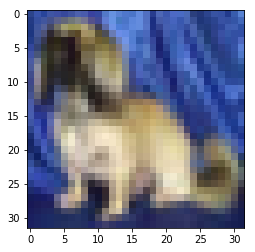

In [9]:
print(u"Sample_Label : %s" % labeldict[sample_label])
plt.imshow(sample_img)

### Erzeugung des CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dense
from keras.layers import Dropout, Activation , Flatten

input_shape = X_train.shape[1:]

model = Sequential()

model.add(Conv2D(32,(5,5),padding ='same',input_shape=input_shape)) # 5x5x32' Conv 
model.add(Activation('relu')) # relu

model.add(Conv2D(32, (3, 3)))# 3x3x32 Conv
model.add(MaxPool2D(pool_size=(2,2))) # 2x2 max pool 
model.add(Activation('relu'))
#model.add(Dropout(0.25)) #

model.add(Conv2D(64,(3,3),padding='same')) # 3x3x64
model.add(Activation('relu')) # relu

model.add(Conv2D(64,(3,3))) # 3x3x64'
model.add(MaxPool2D(pool_size=(2,2)))# 2x2  maxpool
#model.add(Dropout(0.5)) # Dropout 

model.add(Flatten()) # 
model.add(Dense(1024,activation='relu')) # Hidden Layer
#model.add(Dropout(0.25))

model.add(Dense(NUM_CLASSES,activation='softmax'))  # Softmax

#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=512, epochs=10,verbose=1,validation_data=(X_test, y_test),shuffle=True)

In [ ]:
model.evaluate(X_test,y_test, verbose=1) 

In [11]:
early_stopping = keras.callbacks.ModelCheckpoint(filepath="model_v1.h5", monitor='val_loss',
                                verbose=0, save_best_only=True,
                                save_weights_only=False, mode='auto', period=1)

### Early Stopping Callback hinzufügen

In [1]:
model.fit(X_train, y_train, callbacks=[early_stopping] ,batch_size=512, epochs=10,verbose=1,validation_data=(X_test, y_test),shuffle=True)

NameError: name 'model' is not defined

### Preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

NameError: name 'X_train' is not defined